# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(mouse_metadata,study_results , how="left", on=["Mouse ID" , "Mouse ID"])

# Display the data table for preview
study_data_complete.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mice_count = study_data_complete['Mouse ID'].nunique()
print(mice_count)

249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicates = study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

# Unique Mouse IDs from these duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

# Display the unique Mouse IDs with duplicates
duplicate_mouse_ids




array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

# Identify duplicate data by 'Mouse ID' and 'Timepoint'
duplicate_mice = study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'])]

# Display duplicate mice
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Remove all rows with these Mouse IDs
#The tilde (~) operator is used to negate the boolean Series, so it selects the rows where the 'Mouse ID' is not in the duplicate_mouse_ids list.
clean_data = study_data_complete[~study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the first few rows of the clean DataFrame to verify
clean_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_data['Mouse ID'].nunique()
print(new_mice_count)

248


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


# Group the data by 'Drug Regimen'
drug_regime_group = clean_data.groupby('Drug Regimen')

# Calculate summary statistics
summary_stats = drug_regime_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()

# Rename the columns for better readability
summary_stats.columns = [
    'Drug Regimen', 
    'Mean Tumor Volume', 
    'Median Tumor Volume', 
    'Tumor Volume Variance', 
    'Tumor Volume Std. Dev.', 
    'Tumor Volume SEM'
]

summary_stats



,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

advanced_summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
).reset_index()

advanced_summary_stats


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

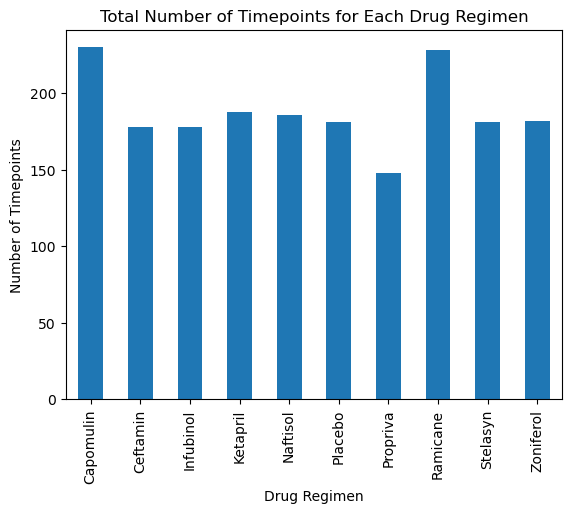

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Calculates the total number of rows for each drug regimen
drug_regimen_counts = clean_data.groupby('Drug Regimen').count()['Mouse ID']

# Generates a bar plot using Pandas
bar_plot = drug_regimen_counts.plot(kind='bar', title='Total Number of Timepoints for Each Drug Regimen')

# Sets the labels for the axes
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Number of Timepoints')

# Shows plot
bar_plot



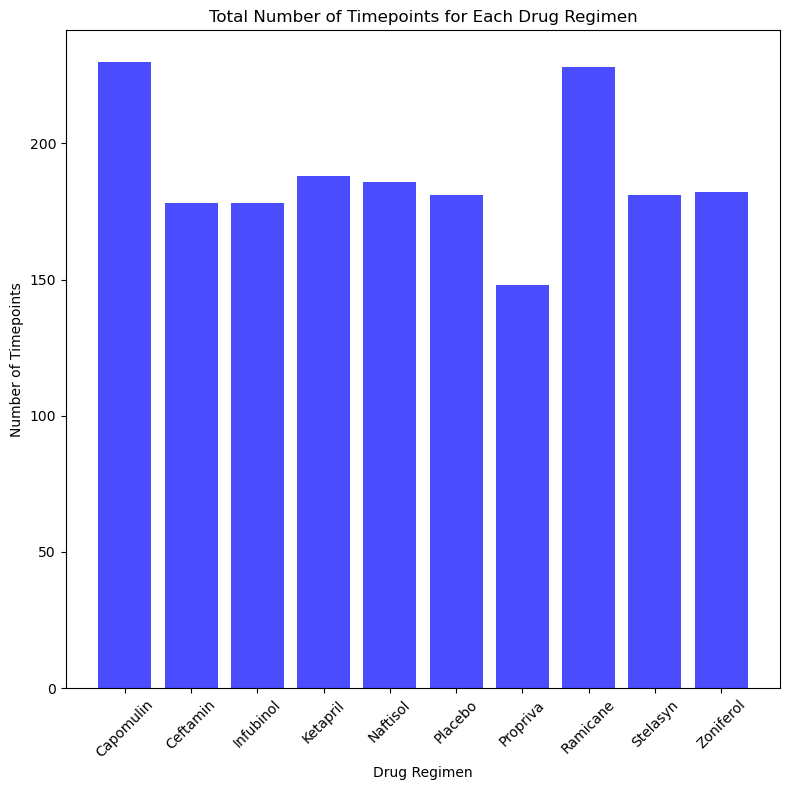

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculates the total number of rows for each drug regimen
drug_regimen_counts = clean_data.groupby('Drug Regimen').count()['Mouse ID']

# Gets the x-axis labels (drug regimens)
x_labels = drug_regimen_counts.index

# Creates a bar plot using pyplot
plt.figure(figsize=(8,8))
plt.bar(x_labels, drug_regimen_counts, alpha=0.7, color='blue')

# Adds title and labels to the plot
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long

# Shows plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


<Axes: title={'center': 'Distribution of Female vs Male Mice'}, ylabel='count'>

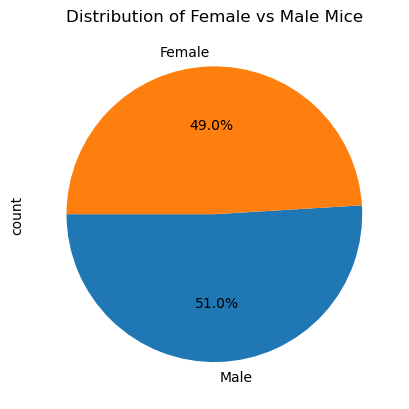

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculates the distribution of female versus male mice
sex_distribution = clean_data['Sex'].value_counts()

# Generates a pie plot using Pandas
pie_plot = sex_distribution.plot(kind='pie', title='Distribution of Female vs Male Mice', autopct='%1.1f%%', startangle=180)


pie_plot

<Axes: title={'center': 'Distribution of Female vs Male Mice'}>

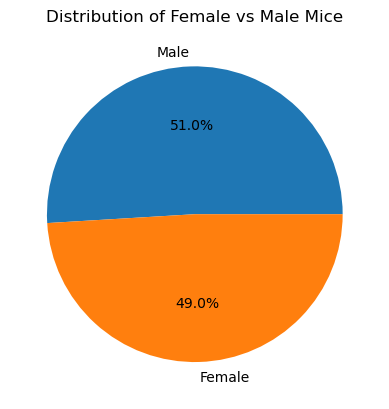

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate the distribution of female versus male mice
sex_distribution = clean_data['Sex'].value_counts()

# Generate a pie plot using Pandas
pie_plot = sex_distribution.plot(kind='pie', title='Distribution of Female vs Male Mice', autopct='%1.1f%%', startangle=0)


pie_plot

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = clean_data[clean_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
#'reset_index()' fiunction converts this Series back into a DataFrame by turning the index ('Mouse ID') 
#back into a column and adding a new numerical index.
# 'max()' fucntionfinds the maximum value of 'Timepoint' for each mouse, which is interpreted as the last (or greatest) timepoint 
last_timepoint = four_treatments.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge the last timepoint data with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

merged_data.head()





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 
 # Determine outliers using upper and lower bounds

# Treatments list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empties list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculates the IQR and quantitatively determine if there are any potential outliers
for drug in treatments:
    
    # Locates the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Adds subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Calculates the IQR (0.25 represents a quartile) 
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determines outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # Print results
    print(f"{drug}'s potential outliers: {outliers.values}")




Capomulin's potential outliers: []
7.781863460000004
Ramicane's potential outliers: []
9.098536719999998
Infubinol's potential outliers: [36.3213458]
11.477135160000003
Ceftamin's potential outliers: []
15.577752179999997


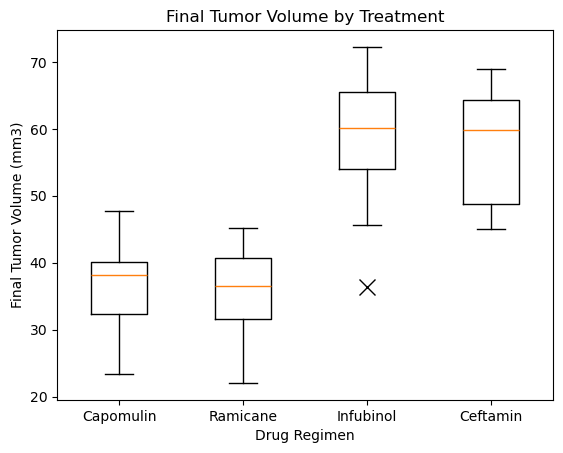

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Assuming tumor_vol_list is a list of lists with each sublist containing tumor volumes for a drug
# The list is in the same order as the treatments list: ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creates a figure and axis
fig, ax = plt.subplots()

# Generates the box plot
#'marker=x' Identifies the shape of the outlier, in this case I used an x 
ax.boxplot(tumor_vol_list, flierprops=dict(marker='x', color='red', markersize=12))

# Add title and labels
ax.set_title('Final Tumor Volume by Treatment')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Add x-tick labels
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Show the plot
plt.show()


## Line and Scatter Plots

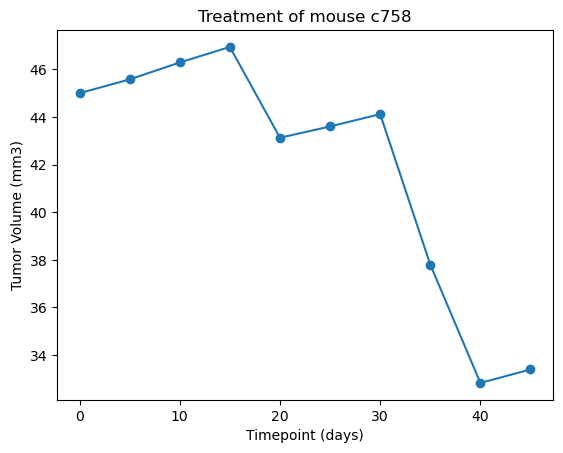

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin 
import matplotlib.pyplot as plt

# Assuming 'merged_data' is a pandas DataFrame with columns 'Timepoint' and 'Tumor Volume (mm3)',
# and a column 'Mouse ID' to filter for the specific mouse.

# Filter the DataFrame for the mouse ID f966 (change this ID to the one you want to plot)
mouse_data = clean_data[clean_data['Mouse ID'] == 'c758']

# Create a line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Treatment of mouse c758')

# Show the plot
plt.show()

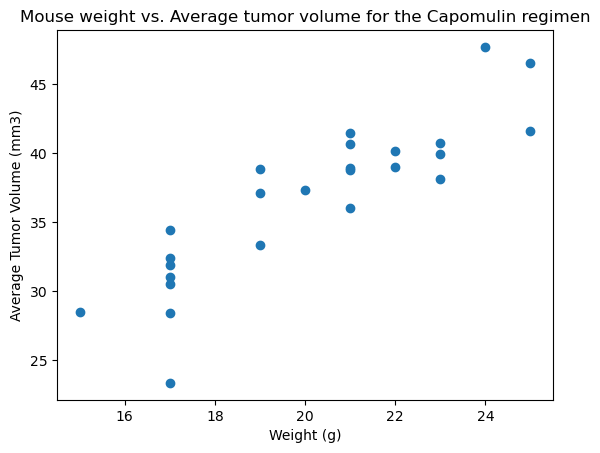

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the merged_data for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group by mouse ID to get the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()

# Create a scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Add title and labels to the plot
plt.title('Mouse weight vs. Average tumor volume for the Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.88


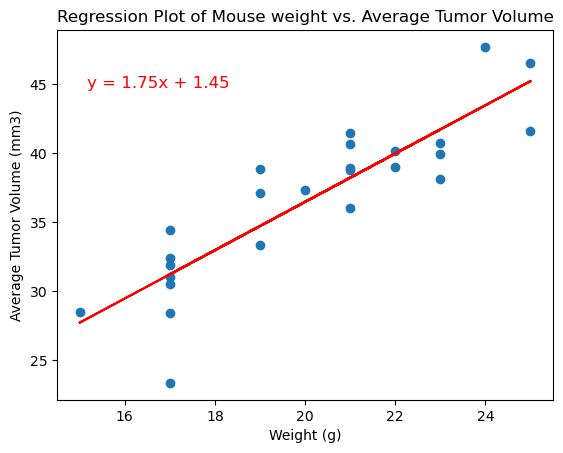

In [33]:
# Calculate the correlation coefficient and a linear regression model 
from scipy.stats import linregress

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the merged_data for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group by mouse ID to get the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'
}).reset_index()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Calculate the regression values
regress_values = average_tumor_volume['Weight (g)'] * slope + intercept

# Create the scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Plot the regression line
plt.plot(average_tumor_volume['Weight (g)'], regress_values, "r-")

# Annotate the plot with the linear regression equation
# I used tuple xytext to shift the position of the Regression formula for increased readability.

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', 
             xy=(average_tumor_volume['Weight (g)'].min(), regress_values.max()), 
             xycoords='data',
             xytext=(5, -5), 
             textcoords='offset points',
             fontsize=12, 
             color="red")



# Add title and labels to the plot
plt.title('Regression Plot of Mouse weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



# Show the plot
plt.show()